In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/UK_foods.csv', index_col="Unnamed: 0")

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


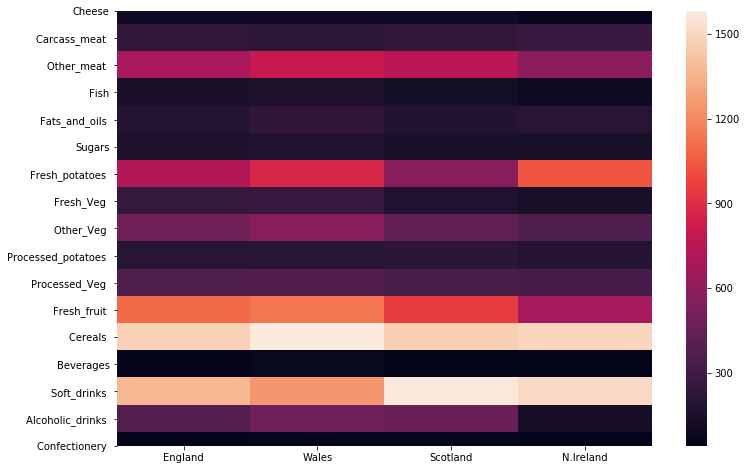

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
seed = 1505
tf.random.set_seed(seed)
np.random.seed(seed)

encoder = Sequential()
encoder.add(Dense(8, activation='relu', input_shape=[17]))
encoder.add(Dense(4, activation='relu'))
encoder.add(Dense(2, activation='relu'))

decoder = Sequential()
decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(8, activation='relu'))
decoder.add(Dense(17, activation='relu'))

In [8]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', 
                    optimizer=SGD(lr=1.5))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.transpose().values)

In [10]:
scaled_df.shape

(4, 17)

In [11]:
autoencoder.fit(scaled_df, scaled_df, epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 61ms/sample - loss: 0.3817
Epoch 2/15
4/4 [==============================] - 0s 736us/sample - loss: 0.2724
Epoch 3/15
4/4 [==============================] - 0s 829us/sample - loss: 0.2497
Epoch 4/15
4/4 [==============================] - 0s 772us/sample - loss: 0.2498
Epoch 5/15
4/4 [==============================] - 0s 730us/sample - loss: 0.2930
Epoch 6/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.2464
Epoch 7/15
4/4 [==============================] - 0s 998us/sample - loss: 0.3134
Epoch 8/15
4/4 [==============================] - 0s 778us/sample - loss: 0.2187
Epoch 9/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2162
Epoch 10/15
4/4 [==============================] - 0s 871us/sample - loss: 0.2447
Epoch 11/15
4/4 [==============================] - 0s 802us/sample - loss: 0.2029
Epoch 12/15
4/4 [==============================] - 0s 761us/sample - loss: 0.2053
Epoch 13/15

In [12]:
encoded_2dim = encoder.predict(scaled_df)

In [13]:
encoded_2dim

array([[9.7655226e-04, 1.2118778e+00],
       [0.0000000e+00, 2.2778738e+00],
       [0.0000000e+00, 1.0988222e+00],
       [1.0429063e+00, 0.0000000e+00]], dtype=float32)

In [14]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [15]:
results = pd.DataFrame(data=encoded_2dim, index=df.transpose().index,
                      columns=['C1', 'C2'])

In [16]:
results = results.reset_index()

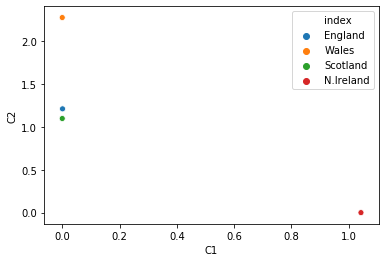

In [17]:
sns.scatterplot(x='C1', y='C2', data=results, hue='index')